<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Polynomial Regression

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Use scikit-learn to implement Polynomial Regression
-   Create a model, train,test and use the model


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#download_data">Downloading Data</a></li>
        <li><a href="#polynomial_regression">Polynomial regression</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#add code below to show multiple outputs
#https://volderette.de/jupyter-notebook-tip-multiple-outputs/
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#If you use this you need to end all matplotlib plot.show() lines with a semicolon or they will show additional text

<h2 id="download_data">Downloading Data</h2>
To download the data, we will use !wget to download it from IBM Object Storage.


In [ ]:
#!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](https://www.ibm.com/us-en/cloud/object-storage?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [2]:
#df = pd.read_csv("FuelConsumption.csv")

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression.


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Lets plot Emission values with respect to Engine size:


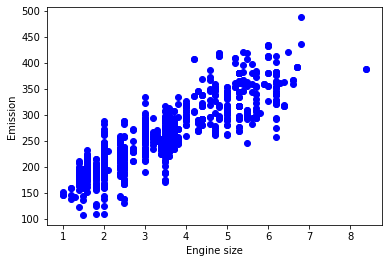

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show();

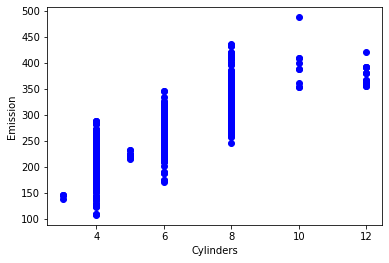

In [5]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show();

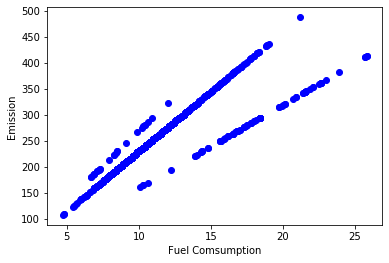

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Comsumption")
plt.ylabel("Emission")
plt.show();

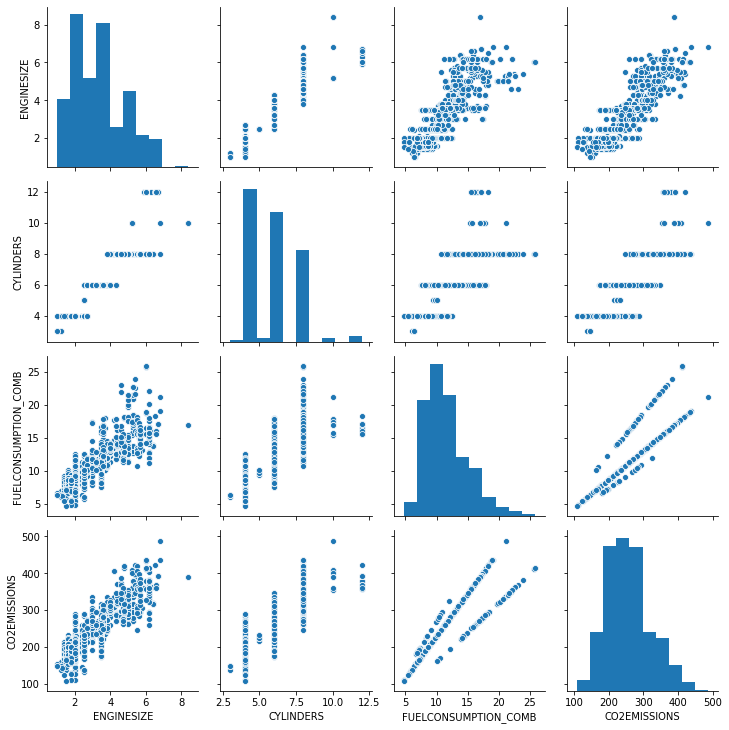

In [109]:
#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(cdf);

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [11]:
# msk = np.random.rand(len(df)) < 0.8
# train = cdf[msk]
# test = cdf[~msk]

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], 
                                                    cdf[['CO2EMISSIONS']], 
                                                    test_size=0.20, 
                                                    random_state=42)

<h2 id="polynomial_regression">Polynomial regression</h2>


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**? 
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# train_x = np.asanyarray(train[['ENGINESIZE']])
# train_y = np.asanyarray(train[['CO2EMISSIONS']])

# test_x = np.asanyarray(test[['ENGINESIZE']])
# test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x[['ENGINESIZE']])
train_x_poly

array([[ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  5.6 , 31.36]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).   

The equation and the sample example is displayed below.   

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 

so we can use **LinearRegression()** function to solve it:


In [63]:
# clf = linear_model.LinearRegression()
# train_y_ = clf.fit(train_x_poly, train_y)
# # The coefficients
# print ('Coefficients: ', clf.coef_)
# print ('Intercept: ',clf.intercept_)

mod = linear_model.LinearRegression()
train_y_fit = mod.fit(train_x_poly, train_y)
train_y_fit
# The coefficients
print ('Coefficients: ', mod.coef_)
print ('\nIntercept: ',mod.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients:  [[ 0.         47.42976379 -1.12705382]]

Intercept:  [112.92021963]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


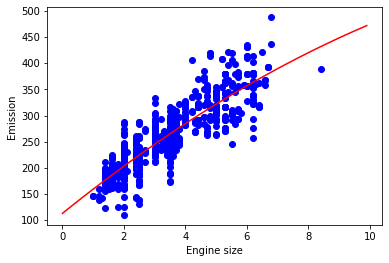

In [23]:
plt.scatter(train_x.ENGINESIZE, train_y.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = mod.intercept_[0]+ mod.coef_[0][1]*XX+ mod.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' ) #https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html
plt.xlabel("Engine size")
plt.ylabel("Emission");

In [24]:
XX

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

<h2 id="evaluation">Evaluation</h2>


In [38]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x[['ENGINESIZE']])
test_y_pred = mod.predict(test_x_poly)

print('ORIGINAL CODE')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred , test_y) ) # THIS IS BACKWARDS!!! True y is first then the predictions
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

from sklearn.metrics import mean_absolute_error, mean_squared_error

print('\nCODE USING sklearn')
print("Mean absolute error: %.2f" % mean_absolute_error(test_y, test_y_pred))
print("Residual sum of squares (RSS or MSE): %.2f" % mean_squared_error(test_y, test_y_pred))
print("Root Mean Squared Error (RMSE): %.2f" % mean_squared_error(test_y, test_y_pred, squared=False))
print("R2-score: %.2f" % r2_score(test_y, test_y_pred) )

ORIGINAL CODE
Mean absolute error: 23.92
Residual sum of squares (MSE): 960.87
R2-score: 0.69

CODE USING sklearn
Mean absolute error: 23.92
Residual sum of squares (RSS or MSE): 960.87
Root Mean Squared Error (RMSE): 31.00
R2-score: 0.77


<h2 id="practice">Practice</h2>
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?



Coefficients:  [[ 0.         29.92154206  3.7724906  -0.41363227]]

Intercept:  [131.29858492]

ORIGINAL CODE
Mean absolute error: 23.82
Residual sum of squares (MSE): 950.52
R2-score: 0.69

CODE USING sklearn
Mean absolute error: 23.82
Residual sum of squares (RSS or MSE): 950.52
Root Mean Squared Error (RMSE): 30.83
R2-score: 0.77


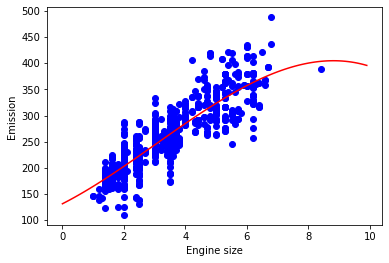

In [61]:
# write your code here
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x[['ENGINESIZE']])
mod3 = linear_model.LinearRegression()
train_y3_ = mod3.fit(train_x_poly3, train_y)

# The coefficients
print ('\nCoefficients: ', mod3.coef_)
print ('\nIntercept: ',mod3.intercept_)

plt.scatter(train_x.ENGINESIZE, train_y.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = mod3.intercept_[0]+ mod3.coef_[0][1]*XX + mod3.coef_[0][2]*np.power(XX, 2) + mod3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly3 = poly3.fit_transform(test_x[['ENGINESIZE']])
test_y3_pred = mod3.predict(test_x_poly3)

print('\nORIGINAL CODE')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_pred , test_y) ) # THIS IS BACKWARDS!!! True y is first then the predictions
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

print('\nCODE USING sklearn')
print("Mean absolute error: %.2f" % mean_absolute_error(test_y, test_y3_pred))
print("Residual sum of squares (RSS or MSE): %.2f" % mean_squared_error(test_y, test_y3_pred))
print("Root Mean Squared Error (RMSE): %.2f" % mean_squared_error(test_y, test_y3_pred, squared=False))
print("R2-score: %.2f" % r2_score(test_y, test_y3_pred) );

<details><summary>Click here for the solution</summary>

```python
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

```

</details>


## Polynomial multiple regression

In [87]:
poly4 = PolynomialFeatures(degree=3)
train_x_poly4 = poly4.fit_transform(train_x)
print('ALL Features')
poly4.get_feature_names(['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB'])
#train_x_poly4[0]

poly5 = PolynomialFeatures(degree=3, interaction_only=True)
train_x_poly5 = poly5.fit_transform(train_x)
print('INTERACTION Features Only')
poly5.get_feature_names(['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB'])
#train_x_poly5[0]

ALL Features


['1',
 'ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_COMB',
 'ENGINESIZE^2',
 'ENGINESIZE CYLINDERS',
 'ENGINESIZE FUELCONSUMPTION_COMB',
 'CYLINDERS^2',
 'CYLINDERS FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB^2',
 'ENGINESIZE^3',
 'ENGINESIZE^2 CYLINDERS',
 'ENGINESIZE^2 FUELCONSUMPTION_COMB',
 'ENGINESIZE CYLINDERS^2',
 'ENGINESIZE CYLINDERS FUELCONSUMPTION_COMB',
 'ENGINESIZE FUELCONSUMPTION_COMB^2',
 'CYLINDERS^3',
 'CYLINDERS^2 FUELCONSUMPTION_COMB',
 'CYLINDERS FUELCONSUMPTION_COMB^2',
 'FUELCONSUMPTION_COMB^3']

INTERACTION Features Only


['1',
 'ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_COMB',
 'ENGINESIZE CYLINDERS',
 'ENGINESIZE FUELCONSUMPTION_COMB',
 'CYLINDERS FUELCONSUMPTION_COMB',
 'ENGINESIZE CYLINDERS FUELCONSUMPTION_COMB']

## All Features

In [131]:
mod4 = linear_model.LinearRegression()
# train_y4_ = mod4.fit(train_x_poly4, train_y)

#https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_x_poly4)
train_y4_ = mod4.fit(scaler.transform(train_x_poly4), train_y)

# The coefficients
print ('\nCoefficients: ', mod4.coef_)
print ('\nIntercept: ', mod4.intercept_)

test_x_poly4 = poly4.fit_transform(test_x)

# test_y4_pred = mod4.predict(test_x_poly4)

test_y4_pred = mod4.predict(scaler.transform(test_x_poly4))

# print('\nORIGINAL CODE')
# print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y4_pred - test_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((test_y4_pred - test_y) ** 2))
# print("R2-score: %.2f" % r2_score(test_y4_pred , test_y) ) # THIS IS BACKWARDS!!! True y is first then the predictions
# #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

print('\nsklearn METRICS')
print("Mean absolute error: %.2f" % mean_absolute_error(test_y, test_y4_pred))
print("Residual sum of squares (RSS or MSE): %.2f" % mean_squared_error(test_y, test_y4_pred))
print("Root Mean Squared Error (RMSE): %.2f" % mean_squared_error(test_y, test_y4_pred, squared=False))
print("R2-score: %.2f" % r2_score(test_y, test_y4_pred) );


Coefficients:  [[   0.           35.609859    -84.43401121  269.43064356 -171.57989221
   -37.39436437  259.51746507  208.41967917 -136.49989211 -460.52047666
  -413.97063928  575.30347178  899.01671482 -217.37816525 -925.48406643
  -513.666426   -308.49829122  841.19960534 -160.86825567  390.9150431 ]]

Intercept:  [257.25674091]

sklearn METRICS
Mean absolute error: 10.30
Residual sum of squares (RSS or MSE): 277.18
Root Mean Squared Error (RMSE): 16.65
R2-score: 0.93


## Feature Importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 35.60986
Feature: 2, Score: -84.43401
Feature: 3, Score: 269.43064
Feature: 4, Score: -171.57989
Feature: 5, Score: -37.39436
Feature: 6, Score: 259.51747
Feature: 7, Score: 208.41968
Feature: 8, Score: -136.49989
Feature: 9, Score: -460.52048
Feature: 10, Score: -413.97064
Feature: 11, Score: 575.30347
Feature: 12, Score: 899.01671
Feature: 13, Score: -217.37817
Feature: 14, Score: -925.48407
Feature: 15, Score: -513.66643
Feature: 16, Score: -308.49829
Feature: 17, Score: 841.19961
Feature: 18, Score: -160.86826
Feature: 19, Score: 390.91504


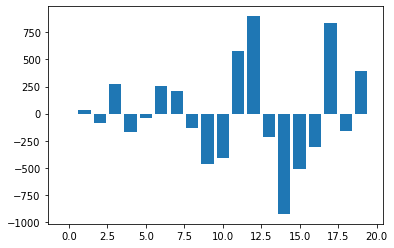

In [132]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
importance = mod4.coef_
for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.show();

Feature: 0, Score: 0.00000
Feature: 1, Score: 2565.73072
Feature: 2, Score: 14160.81940
Feature: 3, Score: 147600.17324
Feature: 4, Score: 59116.44230
Feature: 5, Score: 2790.56205
Feature: 6, Score: 136496.19801
Feature: 7, Score: 86728.37437
Feature: 8, Score: 37480.14517
Feature: 9, Score: 430856.65744
Feature: 10, Score: 343322.79235
Feature: 11, Score: 664473.53125
Feature: 12, Score: 1634148.76660
Feature: 13, Score: 94698.85724
Feature: 14, Score: 1730116.49972
Feature: 15, Score: 536225.65227
Feature: 16, Score: 190270.44393
Feature: 17, Score: 1425224.02511
Feature: 18, Score: 52412.17333
Feature: 19, Score: 311447.03978


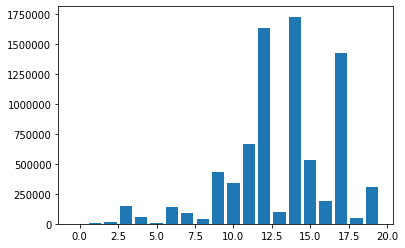

In [130]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(mod4, train_x_poly4, train_y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

## Interactions Only

In [91]:
mod5 = linear_model.LinearRegression()
train_y5_ = mod5.fit(train_x_poly5, train_y)

# The coefficients
print ('\nCoefficients: ', mod5.coef_)
print ('\nIntercept: ', mod5.intercept_)

test_x_poly5 = poly5.fit_transform(test_x)
test_y5_pred = mod5.predict(test_x_poly5)

# print('\nORIGINAL CODE')
# print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y5_pred - test_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((test_y5_pred - test_y) ** 2))
# print("R2-score: %.2f" % r2_score(test_y5_pred , test_y) ) # THIS IS BACKWARDS!!! True y is first then the predictions
# #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

print('\nsklearn METRICS')
print("Mean absolute error: %.2f" % mean_absolute_error(test_y, test_y5_pred))
print("Residual sum of squares (RSS or MSE): %.2f" % mean_squared_error(test_y, test_y5_pred))
print("Root Mean Squared Error (RMSE): %.2f" % mean_squared_error(test_y, test_y5_pred, squared=False))
print("R2-score: %.2f" % r2_score(test_y, test_y5_pred) );


Coefficients:  [[ 0.         32.79749303 34.03814589 32.76798868 -2.70455331 -3.45388334
  -3.28948113  0.46032703]]

Intercept:  [-122.37631985]

sklearn METRICS
Mean absolute error: 14.35
Residual sum of squares (RSS or MSE): 467.27
Root Mean Squared Error (RMSE): 21.62
R2-score: 0.89


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                    |
| ----------------- | ------- | ---------- | ------------------------------------- |
| 2020-11-04        | 2.2     | Lakshmi    | Made changes in markdown of equations |
| 2020-11-03        | 2.1     | Lakshmi    | Made changes in URL                   |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab    |
|                   |         |            |                                       |
|                   |         |            |                                       |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
